In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# **Section I : Accessing the Data**

In [ ]:
data = pd.read_csv("ortho_knnnb.csv")
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal



*   There are Seven variables in the dataset
*   The data contains Basic multiple instances of orthopedic patients


*   We are trying to predict here weather there a patient has a Paget's dieases or not


*   There Target variable class has two categories

    Normal - patient doesn't have Paget's dieases.
    
    Abnormal - patient has Paget's dieases.







## Section II : Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


All the other independent variables are having continous values excluding the dependent variable "class" which has Categorical values

In [ ]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

There are no null values in the data set

In [ ]:
data["class"].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

The Ratio for normal to Abnormal is 1:2

**Outlier Detection on Continous variables**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


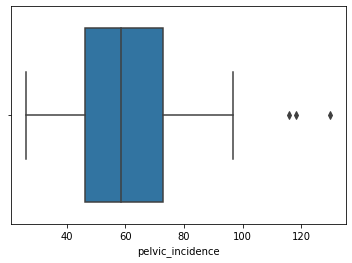

In [ ]:
sns.boxplot(data["pelvic_incidence"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


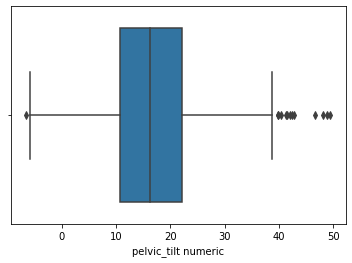

In [ ]:
sns.boxplot(data["pelvic_tilt numeric"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


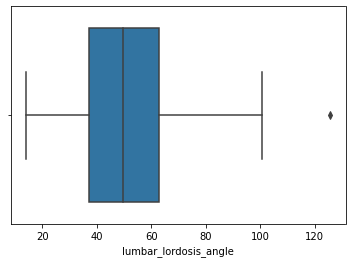

In [ ]:
sns.boxplot(data["lumbar_lordosis_angle"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


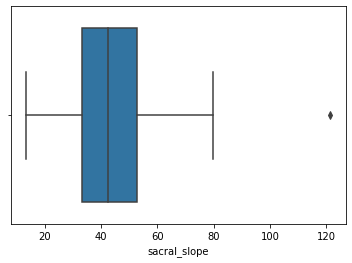

In [ ]:
sns.boxplot(data["sacral_slope"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


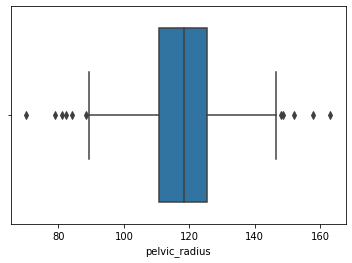

In [ ]:
sns.boxplot(data["pelvic_radius"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


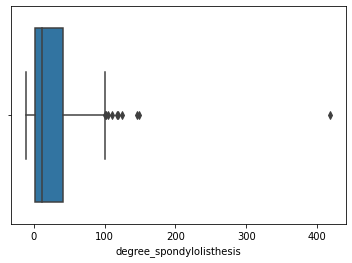

In [ ]:
sns.boxplot(data["degree_spondylolisthesis"])

Since there are Less number of records present in our data set so we are not removing the outliers

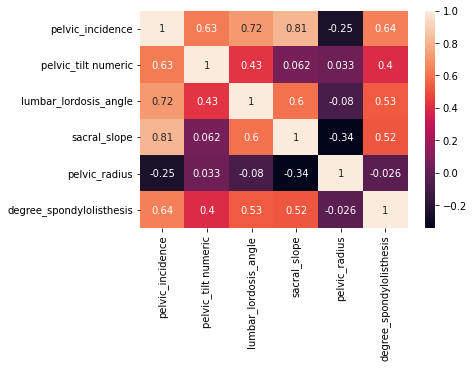

In [ ]:
corr_data = data.corr()
sns.heatmap(corr_data, annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


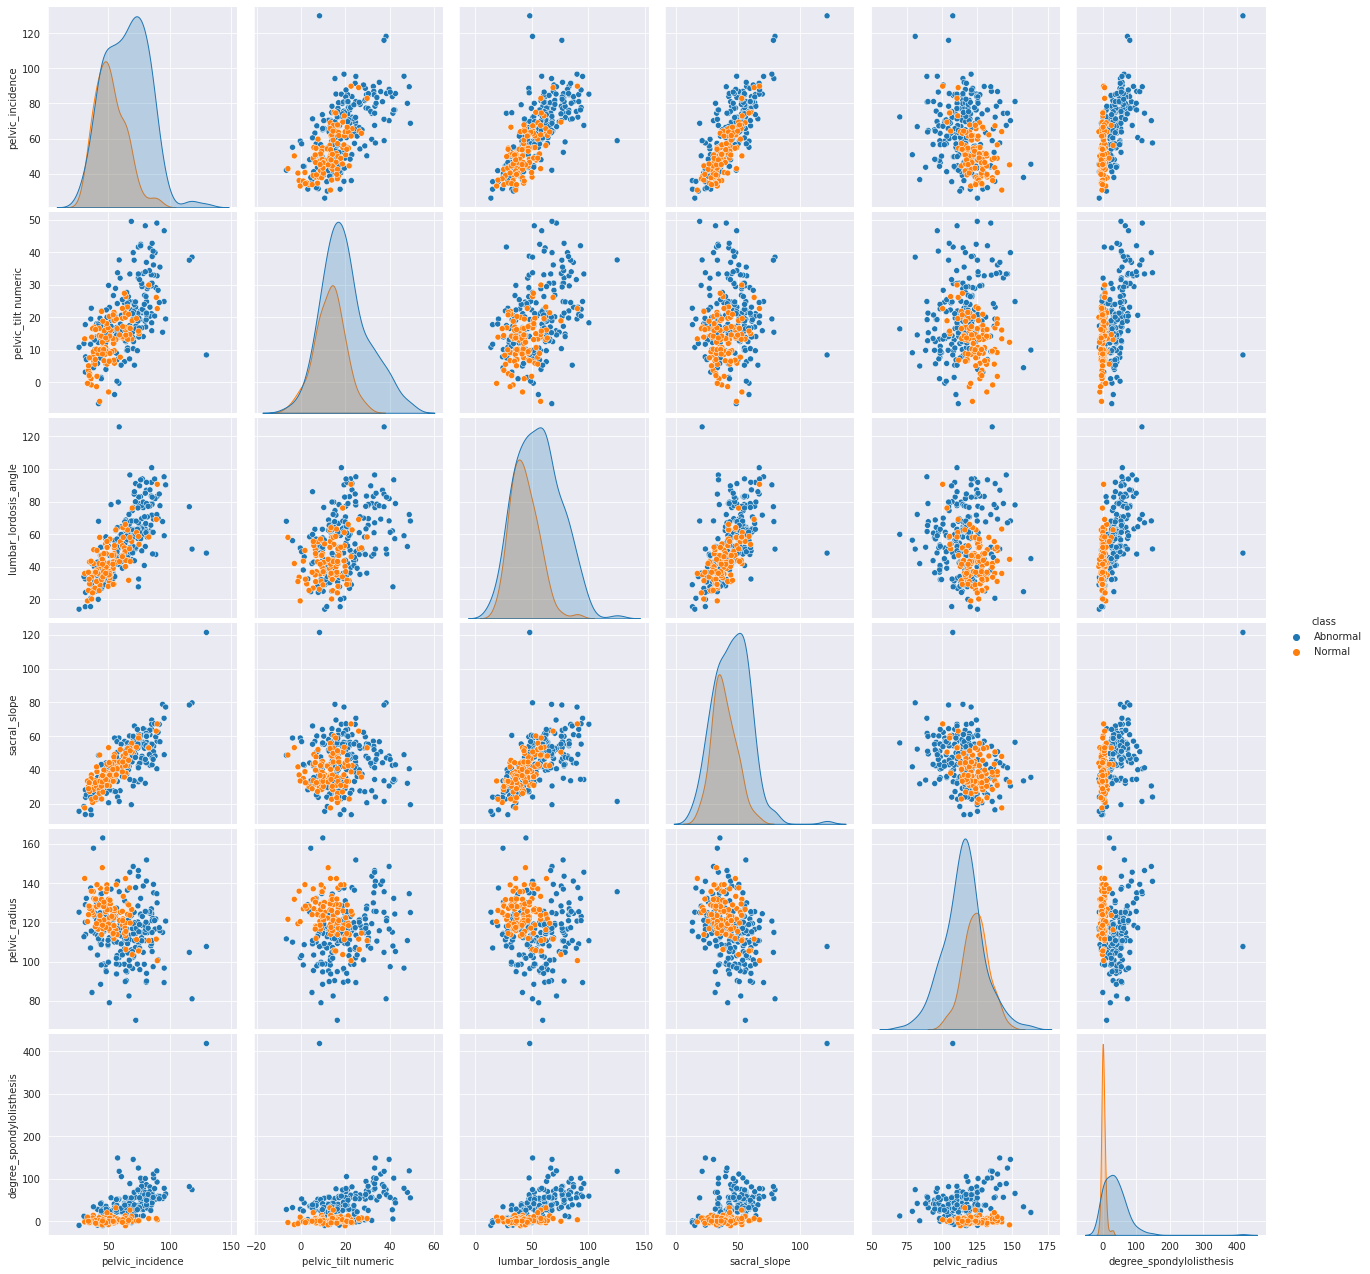

In [ ]:
sns.set_style("darkgrid")
sns.pairplot(data, hue="class", size=3)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["symptom_class"] = encoder.fit_transform(data["class"])

In [ ]:
# data.drop(columns = "class", inplace=True)
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,symptom_class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,0
...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal,1


So we have Replaced the encoded form of "class" as "symptoms_class" column having categories normal=1 and Abnormal=0

In [ ]:
X = data.iloc[:, :6]
X

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [ ]:
y = data.iloc[:, -1]
y

0      0
1      0
2      0
3      0
4      0
      ..
305    1
306    1
307    1
308    1
309    1
Name: symptom_class, Length: 310, dtype: int64

In [ ]:
#normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit_transform(X)

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

Splitting the data into Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Section IV : Training with KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, metric="euclidean")
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [ ]:
pred = knn.predict(X_test)
pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
#validation of built model
from sklearn.metrics import accuracy_score

print(accuracy_score(pred,y_test))

0.9102564102564102


In [ ]:
train_accuracy = []
test_accuracy = []

for k in range(1,16):                           
    KNN = KNeighborsClassifier(n_neighbors=k, metric="euclidean")  
    KNN.fit(X_train, y_train)
    train_pred = KNN.predict(X_train)               
    train_score = accuracy_score(train_pred,y_train)  
    train_accuracy.append(train_score)

    test_pred = KNN.predict(X_test)                  
    test_score = accuracy_score(test_pred,y_test)    
    test_accuracy.append(test_score)  

In [ ]:
print(test_accuracy)

[0.8461538461538461, 0.8846153846153846, 0.8333333333333334, 0.8846153846153846, 0.8461538461538461, 0.8974358974358975, 0.8717948717948718, 0.9102564102564102, 0.8846153846153846, 0.9102564102564102, 0.8846153846153846, 0.9102564102564102, 0.8846153846153846, 0.9102564102564102, 0.8974358974358975]


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, pred)

array([[56,  5],
       [ 2, 15]])

## Section V : Training with Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
NB= GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
pred_nb = NB.predict(X_test)
pred_nb

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
print(accuracy_score(y_test, pred_nb))

0.782051282051282


In [ ]:
confusion_matrix(y_test, pred_nb)

array([[45, 16],
       [ 1, 16]])